In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [19]:
# pip install prophet


In [20]:
from prophet import Prophet


In [21]:
train = pd.read_csv("../data/processed/store_train.csv")
test  = pd.read_csv("../data/processed/store_test.csv")

train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [22]:
prophet_train = train.rename(columns={
    'Date': 'ds',
    'Sales': 'y'
})

prophet_test = test.rename(columns={
    'Date': 'ds',
    'Sales': 'y'
})

In [23]:
prophet_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

In [24]:
prophet_model.fit(prophet_train)

10:41:46 - cmdstanpy - INFO - Chain [1] start processing
10:41:47 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
import os
import joblib

os.makedirs("../models/prophet", exist_ok=True)

joblib.dump(prophet_model, "../models/prophet/prophet_model.pkl")


['../models/prophet/prophet_model.pkl']

In [26]:
future = prophet_model.make_future_dataframe(
    periods=len(prophet_test),
    freq='D'
)


In [27]:
forecast = prophet_model.predict(future)

In [28]:
prophet_forecast = forecast.tail(len(prophet_test))['yhat'].values

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, rmse, mape


In [30]:
prophet_mae, prophet_rmse, prophet_mape = evaluate(
    prophet_test['y'],
    prophet_forecast
)

prophet_mae, prophet_rmse, prophet_mape

(982.2547740667749,
 np.float64(1133.3874429352852),
 np.float64(14.841591585637387))

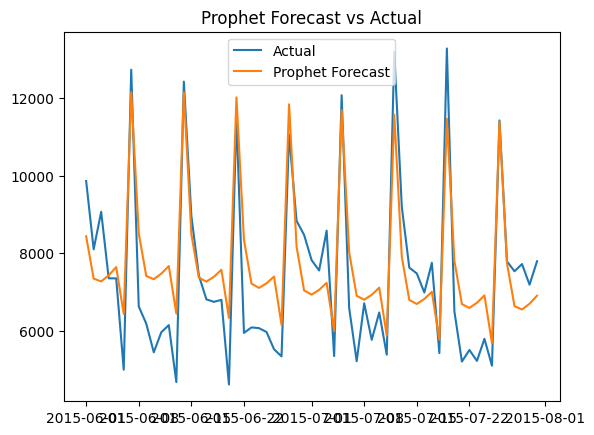

In [31]:
plt.figure()
plt.plot(prophet_test['ds'], prophet_test['y'], label='Actual')
plt.plot(prophet_test['ds'], prophet_forecast, label='Prophet Forecast')
plt.legend()
plt.title("Prophet Forecast vs Actual")
plt.show()

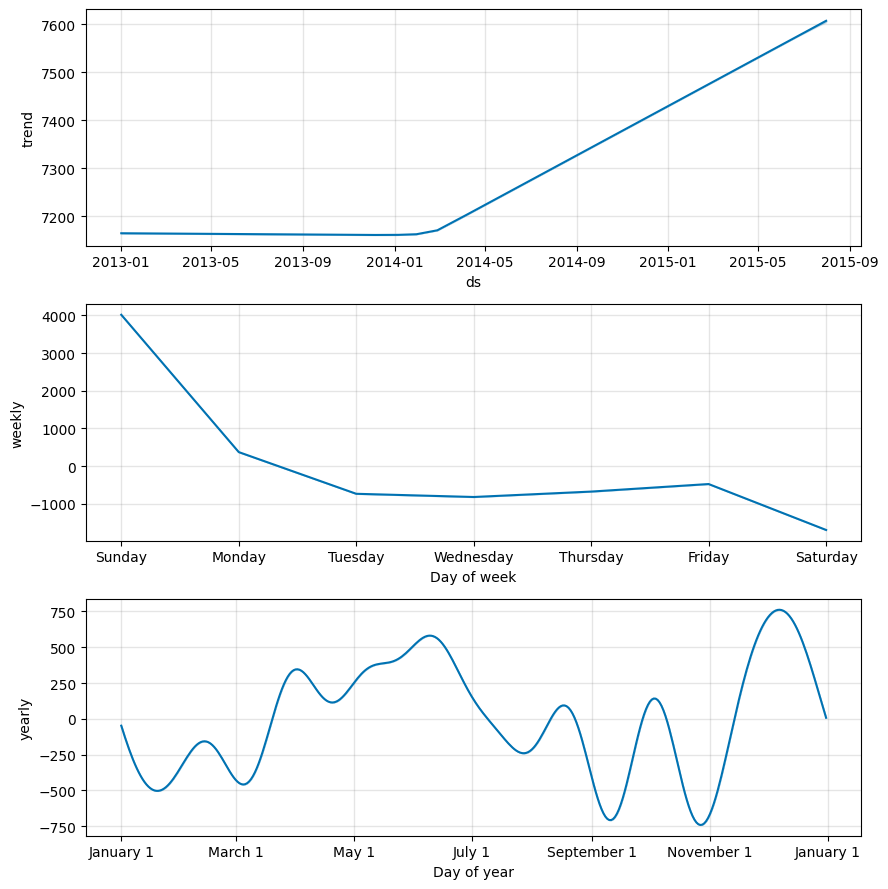

In [32]:
prophet_model.plot_components(forecast)
plt.show()

In [33]:
prophet_results = pd.DataFrame({
    'Model': ['Prophet'],
    'MAE': [prophet_mae],
    'RMSE': [prophet_rmse],
    'MAPE': [prophet_mape]
})

prophet_results.to_csv(
    "../models/baseline/prophet_metrics.csv",
    index=False
)

In [34]:
import joblib
joblib.dump(prophet_model, "../models/prophet/prophet_model.pkl")


['../models/prophet/prophet_model.pkl']

### Phase 8 Summary — Prophet

Prophet was used to model retail sales by explicitly capturing trend and seasonality.
Its interpretable components make it suitable for business forecasting and stakeholder communication.
Performance was evaluated using the same metrics as classical models for fair comparison.
